Pix2Pix dataset: downloading and preprocessing
=========================================

The pix2pix dataset has been released as part of the paper "Image-to-Image Translation with Conditional Adversarial Networks" [arxiv](https://arxiv.org/abs/1611.07004) and it contains five different datasets: cityscapes, edges2handbags, edges2shoes, facades, maps. All these datasets are a pixel to pixle conversion from a domain (e.g. satellite images) to another (map images).

Downloading the dataset
------------------------------------

As first step we need to download one of the datasets. The following code has been readapted from [this repository](https://github.com/affinelayer/pix2pix-tensorflow) and allows downloading the dataset and extracting the compressed files into local folders. Here, we only download the smallest dataset, but you can uncomment one of the other url if you want to download a different one. The size of each dataset is reported on the right.

In [17]:
from urllib2 import urlopen
import tarfile
import tempfile

#dataset_name = "cityscapes" #111 MB
#dataset_name = "edges2handbags" #8.0 GB
#dataset_name = "edges2shoes" #2.3 GB
dataset_name = "facades" #31 MB
#dataset_name = "maps" #253 MB 

url = "https://people.eecs.berkeley.edu/~tinghuiz/projects/pix2pix/datasets/" + dataset_name + ".tar.gz" #31 MB

with tempfile.TemporaryFile() as tmp:
    print("Downloading dataset from: " + url)
    print("Done!")
    shutil.copyfileobj(urlopen(url), tmp)
    print("Extracting compressed file...")
    tmp.seek(0)
    tar = tarfile.open(fileobj=tmp)
    tar.extractall()
    tar.close()
    print("Done!")

Done!
Extracting compressed file...
Done!


Preprocessing in Numpy
------------------------------------

Once the dataset has been downloaded it is possible to preprocess it in order to have valid files that we can use in Tensorflow. This snippet generate Numpy files ready to load in memory via the `numpy.load()` method.

In [16]:
import os
from PIL import Image
import numpy as np

#dataset_name = "cityscapes"
#dataset_name = "edges2handbags"
#dataset_name = "edges2shoes"
dataset_name = "facades"
#dataset_name = "maps"

np_path = "./" + dataset_name
header = "./" + dataset_name + "/train/" 

dataset_features_list = list()
dataset_labels_list = list()
img_counter = 0
for filename in os.listdir(header):
    #print(filename) 
    img_array = np.asarray(Image.open(header + filename))
    width = img_array.shape[1]
    half_width = int(img_array.shape[1] / 2.0)
    first_img_array = img_array[:,0:half_width,:]
    second_img_array = img_array[:,half_width:width,:]
    dataset_features_list.append(first_img_array)
    dataset_labels_list.append(0)
    dataset_features_list.append(second_img_array)
    dataset_labels_list.append(1)
    img_counter += 1
    
dataset_features_matrix = np.array(dataset_features_list)
dataset_labels_array = np.array(dataset_labels_list)
print("Processed " + str(img_counter) + " images...")
print("Dataset (features) shape: " + str(dataset_features_matrix.shape))
print("Dataset (labels) shape: " + str(dataset_labels_array.shape))
print("Saving numpy files...")
np.save(np_path + "_features", dataset_features_matrix)
np.save(np_path + "_labels", dataset_labels_array) 
print("Done!")

Processed 400 images...
Dataset (features) shape: (800, 256, 256, 3)
Dataset (labels) shape: (800,)
Saving numpy files...
Done!


Loading the Numpy dataset
----------------------------------------

Once the numpy files have been stored it is possible to load them in memory and access the images. The following code load the numpy dataset and shows a random image with its label.

Label: 0


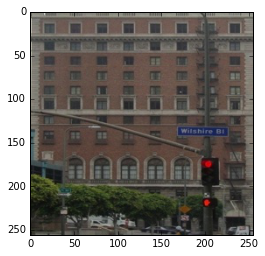

In [32]:
from matplotlib import pyplot as plt
%matplotlib inline

#dataset_name = "cityscapes"
#dataset_name = "edges2handbags"
#dataset_name = "edges2shoes"
dataset_name = "facades"
#dataset_name = "maps"

np_path = "./" + dataset_name

features_matrix = np.load(np_path + "_features.npy")
labels_array = np.load(np_path + "_labels.npy")
dataset_size = features_matrix.shape[0]
random_int = np.random.randint(dataset_size)
image = features_matrix[random_int,:,:,:]
label = labels_array[random_int]
print("Label: " + str(label))
plt.imshow(image)
plt.show()